### Jak przebiega losowanie?

In [5]:
# biblioteka Numpy
import numpy as np

In [8]:
# losowa lista 10-ciu poprawnych odpowiedzi
correct = [np.random.choice(["A", "B", "C", "D"]) for i in range(10)]
correct

['C', 'B', 'B', 'C', 'C', 'C', 'A', 'B', 'B', 'C']

In [11]:
# wybór 10-ciu odpowiedzi przez ucznia (losowy - odpowiedzi wybierane z jednakowym prawdopodobieństwem)
answer = [np.random.choice(["A", "B", "C", "D"]) for i in range(10)]
answer

['C', 'D', 'D', 'D', 'B', 'A', 'A', 'D', 'C', 'C']

In [14]:
# sprawdzenie ile poprawnych
num_correct = 0
for i in range(10):
    if answer[i] == correct[i]: num_correct += 1
num_correct

3

### Symulacja

In [19]:
# parametry

# liczba symulacji
n = 10_000

# liczba pytań na teście
q = 10

# ile poprawnych żeby zdać
to_pass = 6

# możliwe odpowiedzi
possibilities = ["A", "B", "C", "D"] 

In [23]:
# symulacja pisania n testów (wszyskie taktyki podczas jednego testu)
passed_A, passed_B, passed_C, passed_D, passed_E = 0, 0, 0, 0, 0

for i in range(n):
    # klucz odpowiedzi
    correct = [np.random.choice(possibilities) for i in range(q)]
    
    # taktyka A - wybór kompletnie losowy
    answer_A = [np.random.choice(possibilities) for i in range(q)]

    # taktyka B - wybór losowy, ale częściej A i B
    answer_B = [np.random.choice(possibilities, p=[0.4, 0.4, 0.1, 0.1]) for i in range(q)]

    # taktyka C - zawsze B
    answer_C = ["B" for i in range(q)]

    # taktyka D - zygzak
    j = 0
    back = False
    answer_D = []
    for k in range(q):
        answer_D.append(possibilities[j])
        if j == 0: back = False 
        if j == 3: back = True
        if not back: j+=1
        else: j-=1

    # taktyka E - wybór losowy, ale następna odpowiedź inna od poprzedniej
    answer_E = [np.random.choice(possibilities)]
    for i in range(1,q):
        new_possibilities = possibilities[:]
        new_possibilities.remove(answer_E[i-1])
        answer_E.append(np.random.choice(new_possibilities))

    # sprawdzenie odpowiedzi
    num_correct_A, num_correct_B, num_correct_C, num_correct_D, num_correct_E = 0, 0, 0, 0, 0
    for i in range(q):
        if answer_A[i] == correct[i]: num_correct_A += 1
        if answer_B[i] == correct[i]: num_correct_B += 1
        if answer_C[i] == correct[i]: num_correct_C += 1
        if answer_D[i] == correct[i]: num_correct_D += 1
        if answer_E[i] == correct[i]: num_correct_E += 1

    # czy zdany test?
    if num_correct_A >= to_pass: passed_A += 1
    if num_correct_B >= to_pass: passed_B += 1
    if num_correct_C >= to_pass: passed_C += 1
    if num_correct_D >= to_pass: passed_D += 1
    if num_correct_E >= to_pass: passed_E += 1

# przybliżone prawdopodobieństwa zdania
prob_A = round(passed_A/n*100,2)
prob_B = round(passed_B/n*100,2)
prob_C = round(passed_C/n*100,2)
prob_D = round(passed_D/n*100,2)
prob_E = round(passed_E/n*100,2)

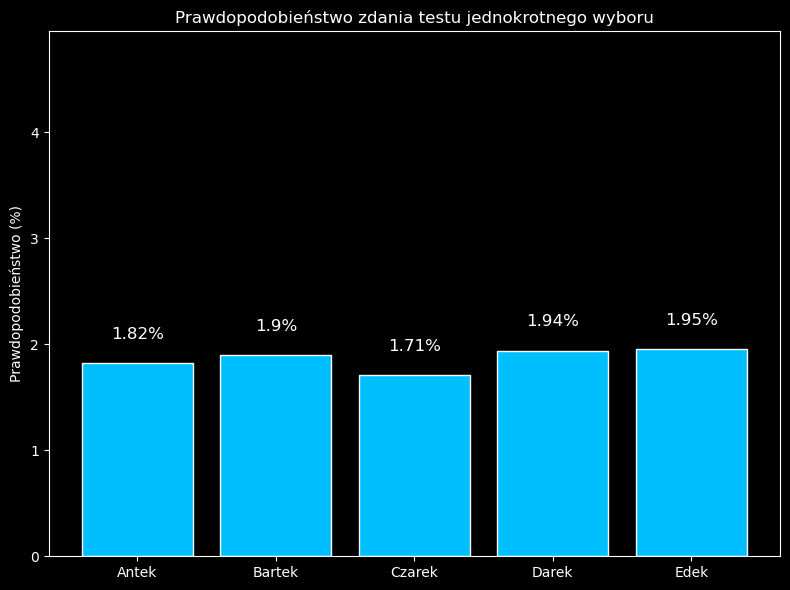

In [25]:
# wizualizacja wyników - która taktyka jest najlepsza?

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Nazwy kategorii i odpowiadające im wartości
labels = ['Antek', 'Bartek', 'Czarek', 'Darek', 'Edek']
values = [prob_A, prob_B, prob_C, prob_D, prob_E]

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color='deepskyblue', edgecolor='white')

# Dodanie wartości nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.2, f'{yval}%', ha='center', va='bottom', color='white', fontsize=12)

# Dodanie tytułu i etykiet
plt.title('Prawdopodobieństwo zdania testu jednokrotnego wyboru')
plt.ylabel('Prawdopodobieństwo (%)')

# Wartości na osi Y
plt.ylim(0, max(values) + 3)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

### Czy wyniki te różnią się istotnie od 1,97%?

In [30]:
# testy istotności dla prawdopodobieństw (czy strategie istotnie wpływają na poprawienie się szans na zdanie egzaminu?)
import numpy as np
from scipy.stats import norm

# Dane wejściowe w procentach
probabilities_percent = {
    'A': prob_A,
    'B': prob_B,
    'C': prob_C,
    'D': prob_D,
    'E': prob_E
}

# Parametry testu
p0 = 0.0197  # wartość odniesienia (1.97%)
n = 10000

# Wyniki testów
print("Testy istotności (czy prawdopodobieństwa różnią się od 1.97%):\n")

for label, prob_percent in probabilities_percent.items():
    phat = prob_percent / 100  # konwersja do proporcji
    se = np.sqrt(p0 * (1 - p0) / n)
    z = (phat - p0) / se
    p_value = 2 * (1 - norm.cdf(abs(z)))  # test dwustronny

    print(f"prob_{label}: {prob_percent:.2f}% -> z = {z:.3f}, p = {p_value:.4f} ->", 
          "istotna różnica" if p_value < 0.05 else "brak istotnej różnicy")

Testy istotności (czy prawdopodobieństwa różnią się od 1.97%):

prob_A: 1.82% -> z = -1.079, p = 0.2804 -> brak istotnej różnicy
prob_B: 1.90% -> z = -0.504, p = 0.6145 -> brak istotnej różnicy
prob_C: 1.71% -> z = -1.871, p = 0.0614 -> brak istotnej różnicy
prob_D: 1.94% -> z = -0.216, p = 0.8291 -> brak istotnej różnicy
prob_E: 1.95% -> z = -0.144, p = 0.8856 -> brak istotnej różnicy
